# **SC16. Aprendizaje No Supervisado**

## **Preparación y preprocesamiento de los datos antes de agruparlos**

### Transformación de datos numéricos

In [1]:
import pandas as pd

data = {
    "Iris": [1, 2, 3, 4, 5, 6],
    "sepallength": [5.1, 4.9, 7.0, 6.4, 6.3, 5.8],
    "sepalwidth": [3.5, 3.0, 3.2, 3.2, 3.3, 2.7],
    "petallength": [1.4, 1.4, 4.7, 4.5, 6.0, 5.1],
    "petalwidth": [0.2, 0.2, 1.4, 1.5, 2.5, 1.9],
    "class": ["iris-setosa", "iris-setosa", "iris-versicolor", "iris-versicolor", "iris-virginica", "iris-virginica"]
}

df = pd.DataFrame(data)
print(df.head())

   Iris  sepallength  sepalwidth  petallength  petalwidth            class
0     1          5.1         3.5          1.4         0.2      iris-setosa
1     2          4.9         3.0          1.4         0.2      iris-setosa
2     3          7.0         3.2          4.7         1.4  iris-versicolor
3     4          6.4         3.2          4.5         1.5  iris-versicolor
4     5          6.3         3.3          6.0         2.5   iris-virginica


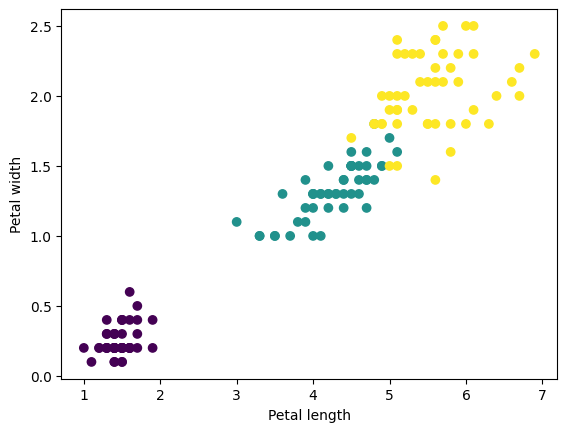

In [2]:
from sklearn import cluster, datasets, metrics
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X_iris = np.array(iris.data)
y_iris = np.array(iris.target)

plt.scatter(X_iris[:, 2], X_iris[:, 3], c=y_iris)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

#### Escalado

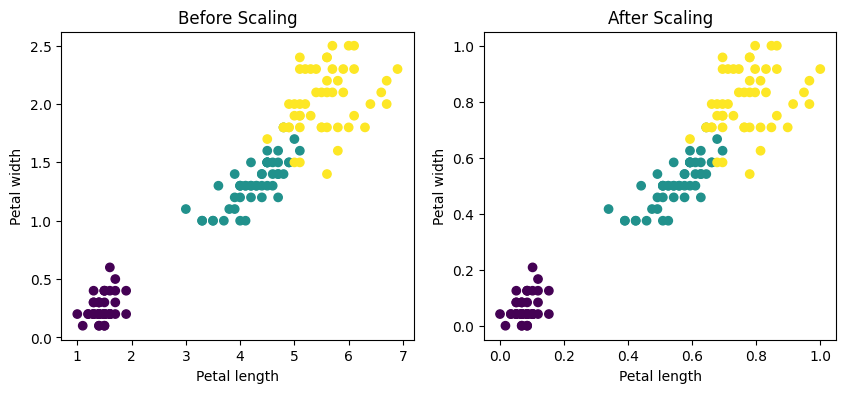

In [3]:
from sklearn.preprocessing import MinMaxScaler

X2 = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_iris)

fig,(ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.scatter(X_iris[:, 2], X_iris[:, 3], c=y_iris)
ax0.set_title('Before Scaling')
ax0.set_xlabel('Petal length')
ax0.set_ylabel('Petal width')

ax1.scatter(X2[:, 2], X2[:, 3], c=y_iris)
ax1.set_title('After Scaling')
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

plt.show()

#### Estandarización

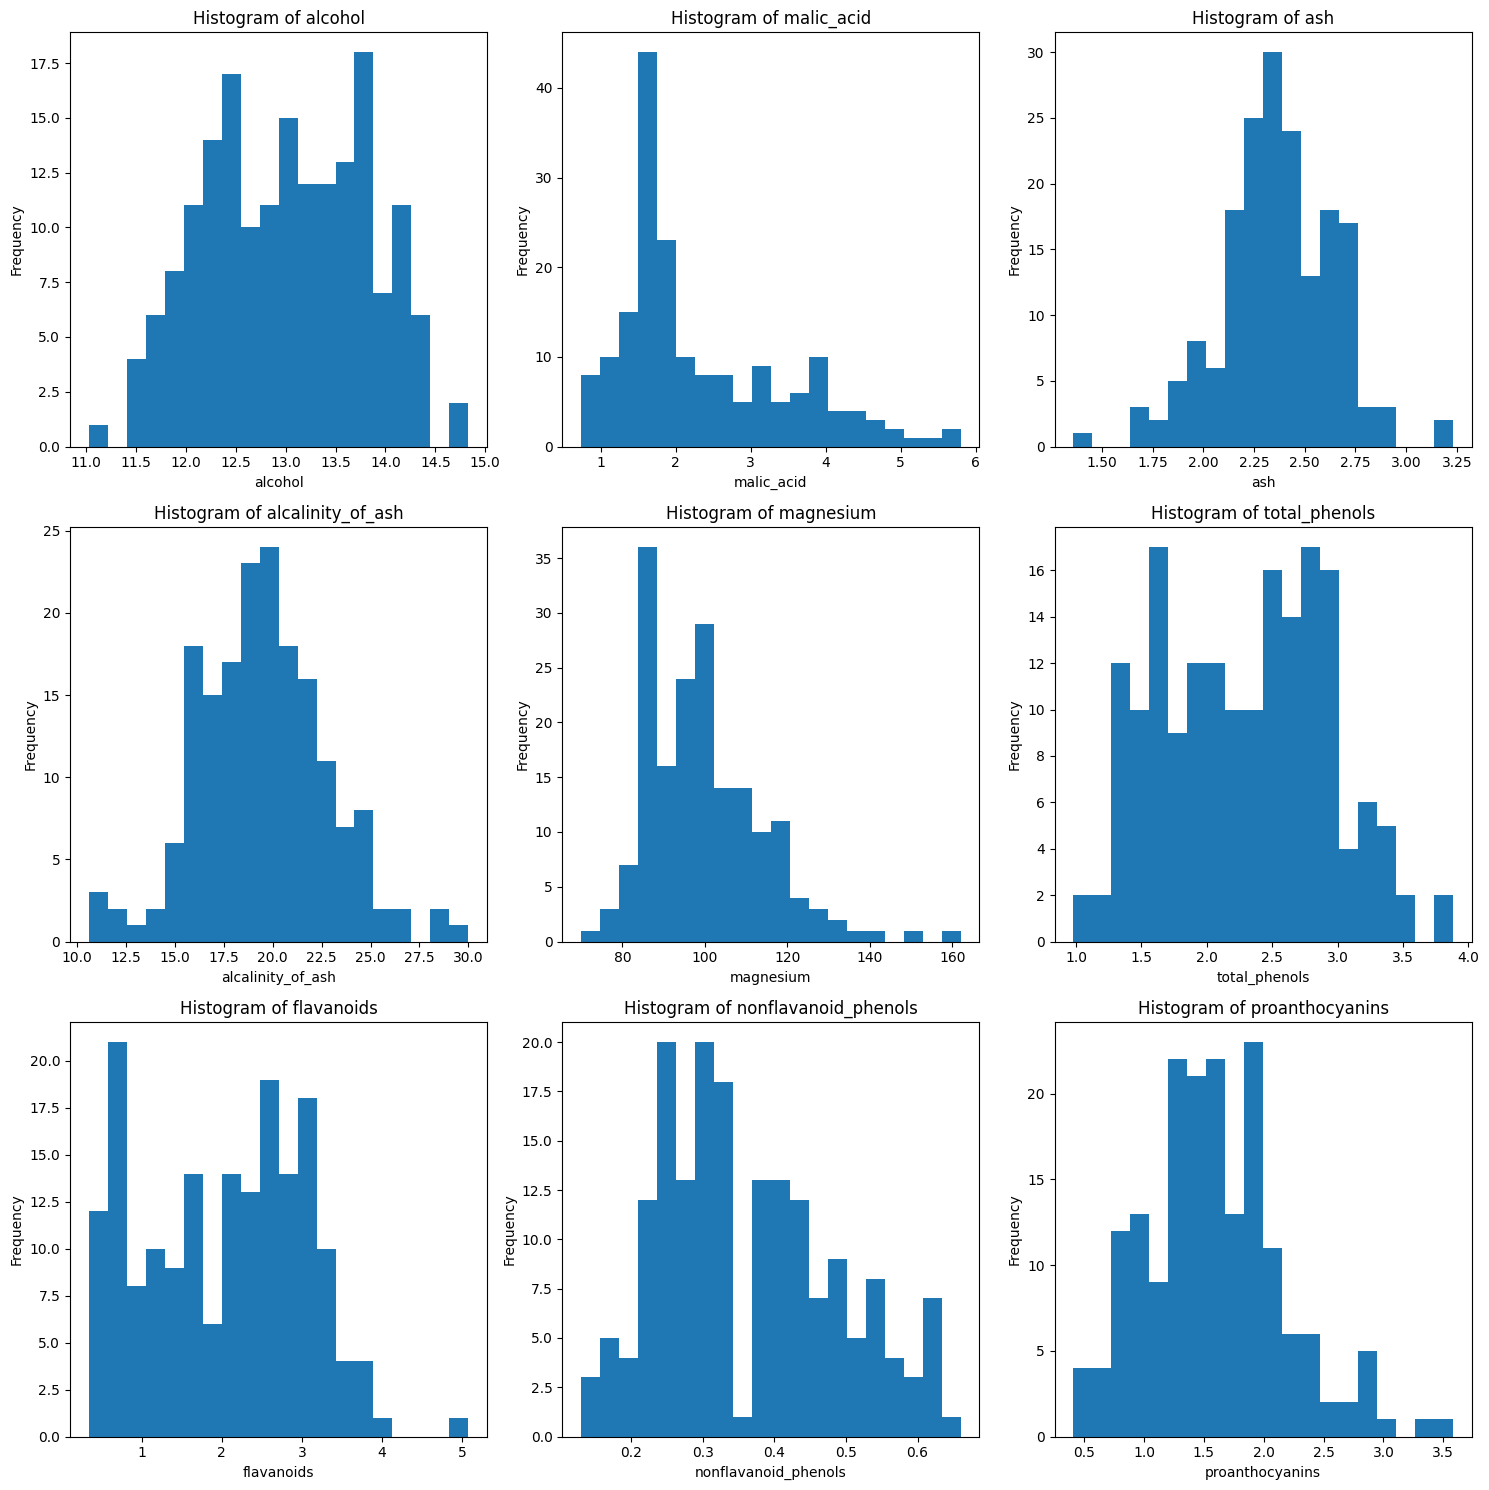

In [4]:
wine = datasets.load_wine()
X_wine = np.array(wine.data)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(wine.feature_names):
    if i < len(axes):
        axes[i].hist(X_wine[:, i], bins=20)
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


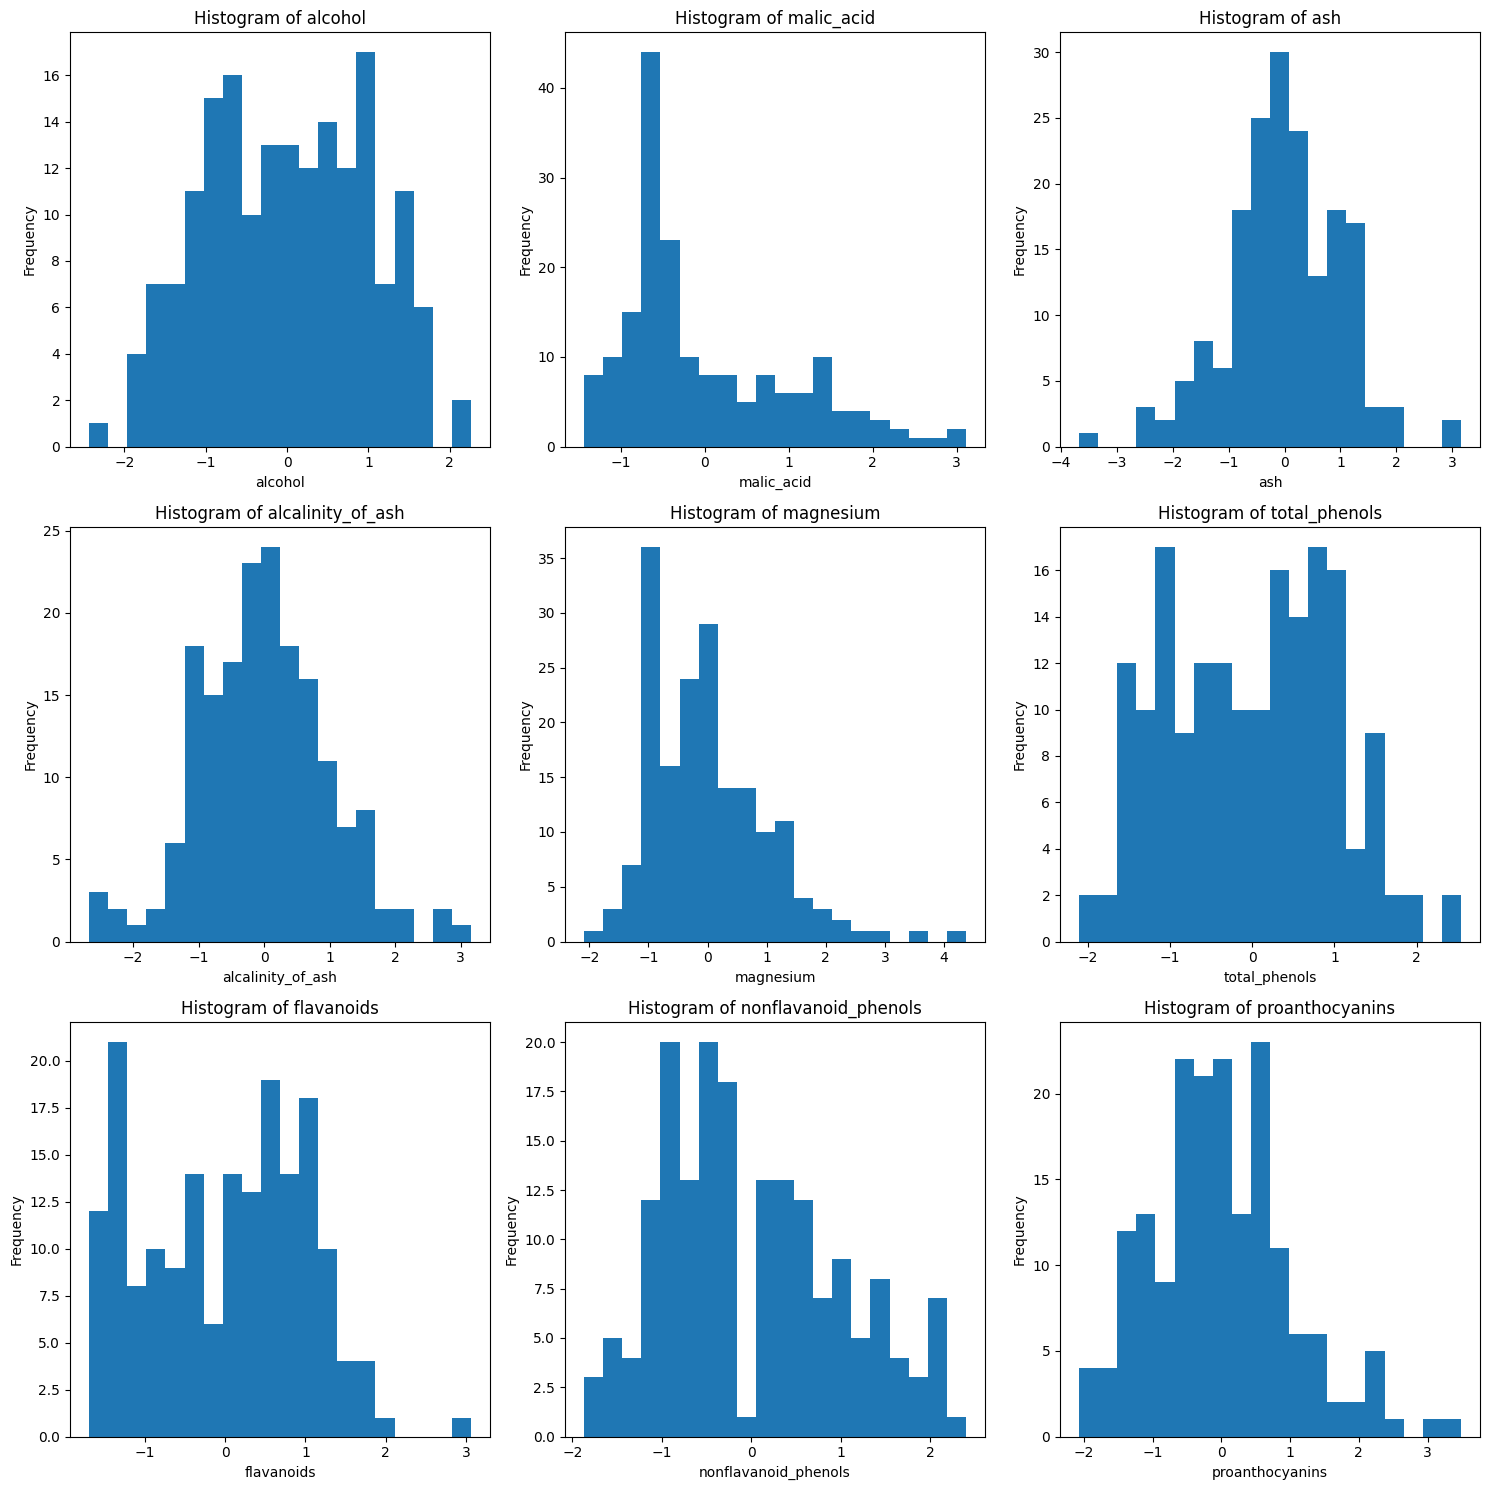

In [5]:
from sklearn.preprocessing import StandardScaler

X2_wine = StandardScaler().fit_transform(X_wine)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(wine.feature_names):
    if i < len(axes):
        axes[i].hist(X2_wine[:, i], bins=20)
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Normalización

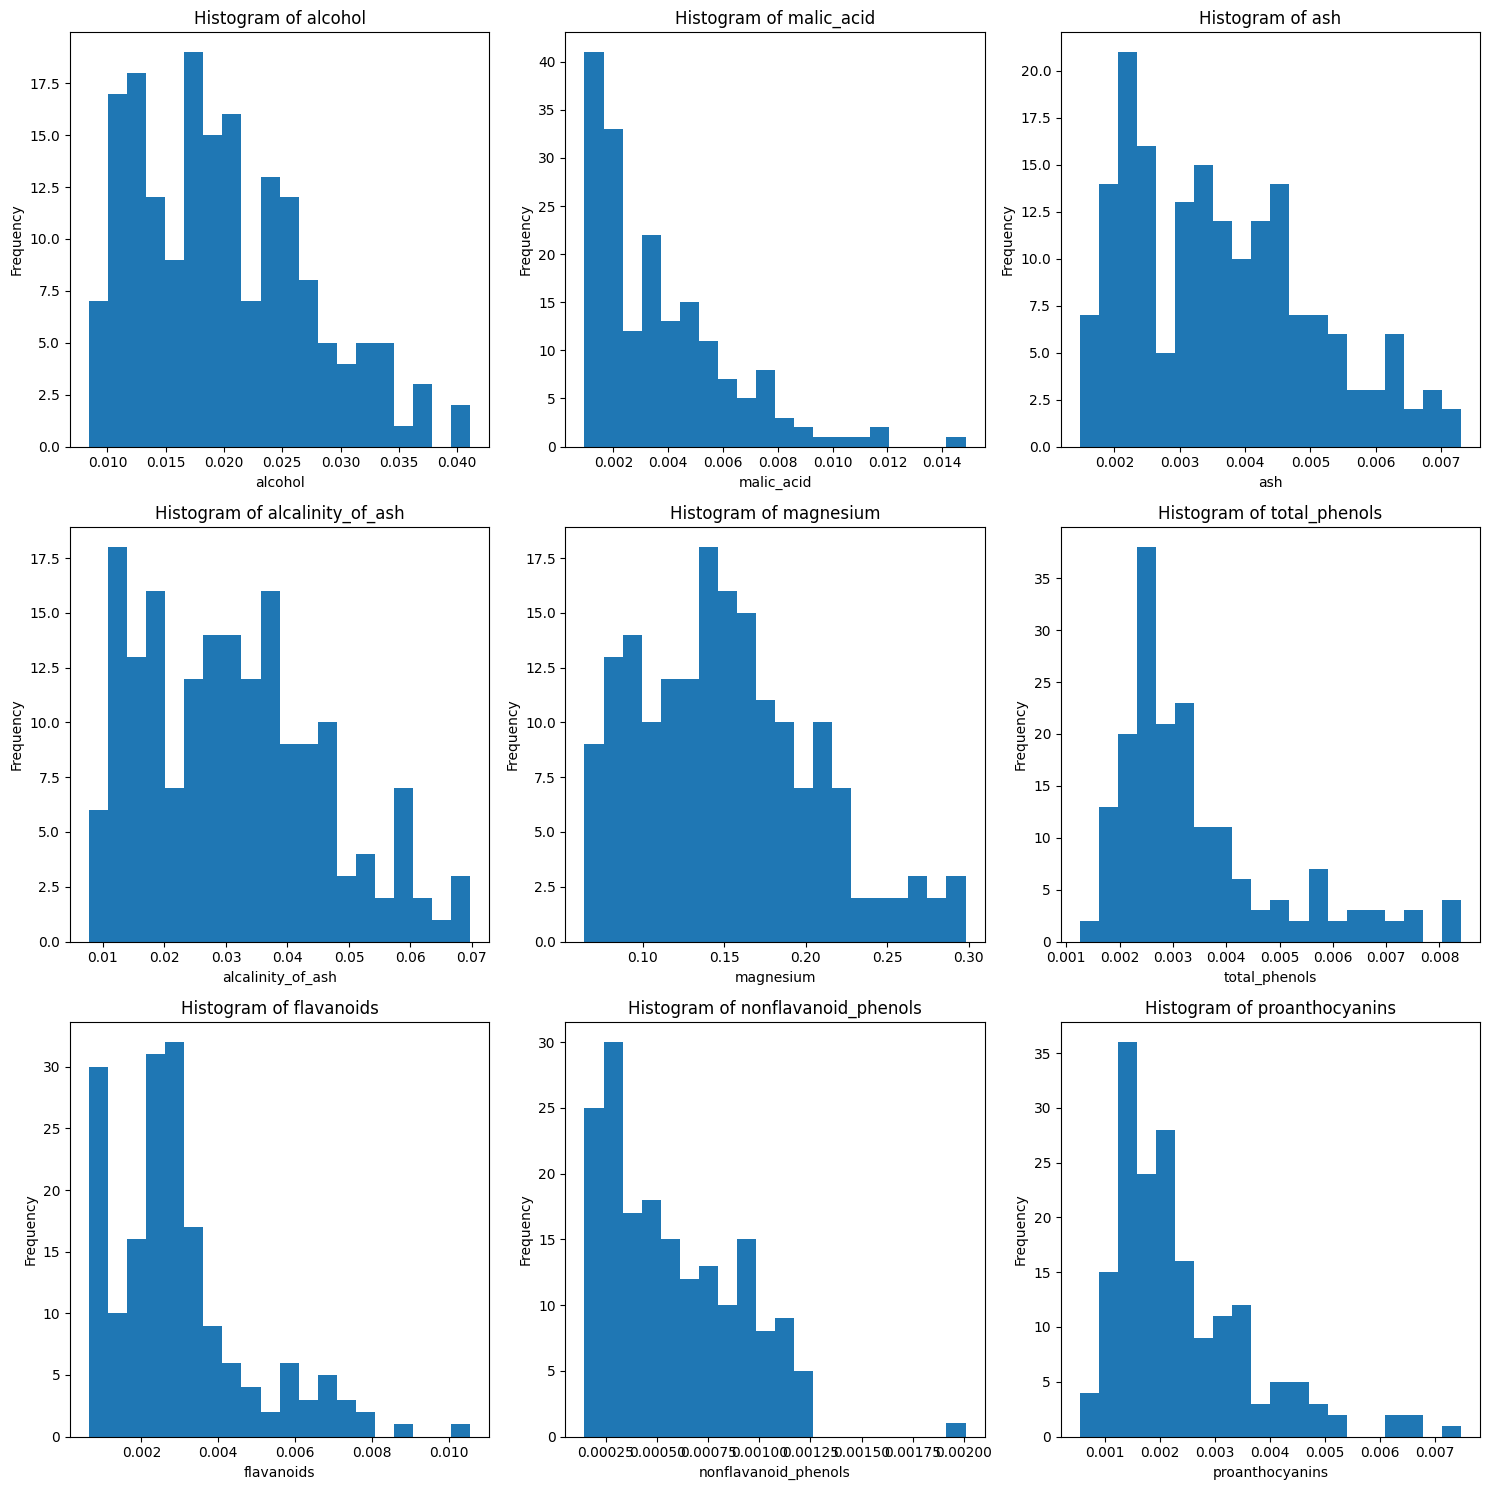

In [6]:
from sklearn.preprocessing import normalize

X3_wine = normalize(X_wine)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(wine.feature_names):
    if i < len(axes):
        axes[i].hist(X3_wine[:, i], bins=20)
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Transformación de datos categóricos

In [7]:
data = {
    'SEXO':['M', 'F', 'M', 'F','F'],
    'REGION':['EU','AS','US','EU','US'],
    'NAVEGADOR':['Edge','Chrome','Safari','Firefox','Safari']
}

df = pd.DataFrame(data)
print(df)

  SEXO REGION NAVEGADOR
0    M     EU      Edge
1    F     AS    Chrome
2    M     US    Safari
3    F     EU   Firefox
4    F     US    Safari


#### Ordinal Encoder

In [8]:
from sklearn.preprocessing import OrdinalEncoder

X = df.values

X2 = OrdinalEncoder().fit_transform(X)
print(X2)

[[1. 1. 1.]
 [0. 0. 0.]
 [1. 2. 3.]
 [0. 1. 2.]
 [0. 2. 3.]]


#### One-Hot Encoder

In [9]:
from sklearn.preprocessing import OneHotEncoder

X3 = OneHotEncoder().fit_transform(X).toarray()
print(X3)

[[0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1.]]


## **Agrupar datos con distintos algoritmos de agrupamiento**

### Algoritmo de agrupamiento K-Means

In [10]:
data = {
    "ANIMAL": ["Leon Marino", "Elefante", "Leopardo", "Cangrejo", "Medusa", "Gusano"],
    "ACUATICO": [1, 0, 0, 1, 1, 0],
    "PATAS": [2, 4, 4, 8, 0, 0]
}

df = pd.DataFrame(data)
print(df)

        ANIMAL  ACUATICO  PATAS
0  Leon Marino         1      2
1     Elefante         0      4
2     Leopardo         0      4
3     Cangrejo         1      8
4       Medusa         1      0
5       Gusano         0      0


#### Ejemplo Zoo

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[['ACUATICO', 'PATAS']])
df['Cluster'] = kmeans.predict(df[['ACUATICO', 'PATAS']])

print(df)

        ANIMAL  ACUATICO  PATAS  Cluster
0  Leon Marino         1      2        2
1     Elefante         0      4        0
2     Leopardo         0      4        0
3     Cangrejo         1      8        0
4       Medusa         1      0        1
5       Gusano         0      0        1


#### Ejemplo Iris

In [12]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = np.array(iris.data)


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

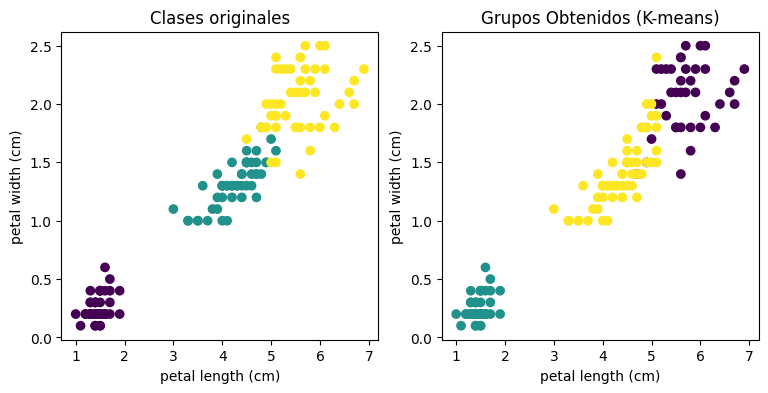

In [14]:
y = np.array(iris.target)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 4))

ax0.scatter(X[:, 2], X[:, 3], c=y)
ax0.set_title('Clases originales')
ax0.set_xlabel(iris.feature_names[2])
ax0.set_ylabel(iris.feature_names[3])

ax1.scatter(X[:, 2], X[:, 3], c=labels)
ax1.set_title('Grupos Obtenidos (K-means)')
ax1.set_xlabel(iris.feature_names[2])
ax1.set_ylabel(iris.feature_names[3])

plt.show()

#### Agrupación con StandardScaler

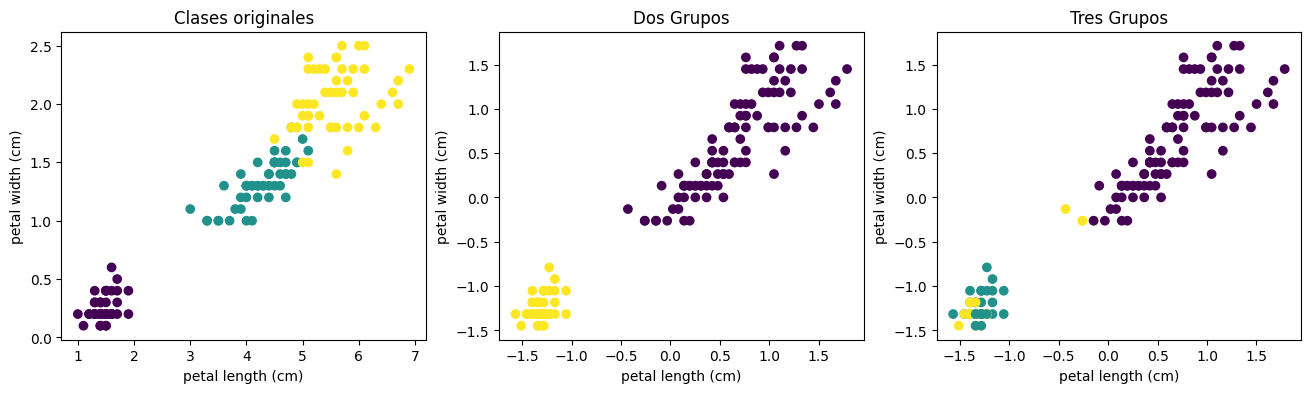

In [15]:
from sklearn.preprocessing import StandardScaler

X2 = StandardScaler().fit_transform(X)
y2 = KMeans(n_clusters=2, random_state=42).fit_predict(X2)
y3 = KMeans(n_clusters=3, random_state=42).fit_predict(X2)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(16, 4))

ax0.scatter(X[:, 2], X[:, 3], c=y)
ax0.set_title('Clases originales')
ax0.set_xlabel(iris.feature_names[2])
ax0.set_ylabel(iris.feature_names[3])

ax1.scatter(X2[:, 2], X2[:, 3], c=y2)
ax1.set_title('Dos Grupos')
ax1.set_xlabel(iris.feature_names[2])
ax1.set_ylabel(iris.feature_names[3])

ax2.scatter(X2[:, 2], X2[:, 3], c=y3)
ax2.set_title('Tres Grupos')
ax2.set_xlabel(iris.feature_names[2])
ax2.set_ylabel(iris.feature_names[3])

plt.show()

### Agrupar datos utilizando otros algoritmos de agrupamiento

#### Single Linkage

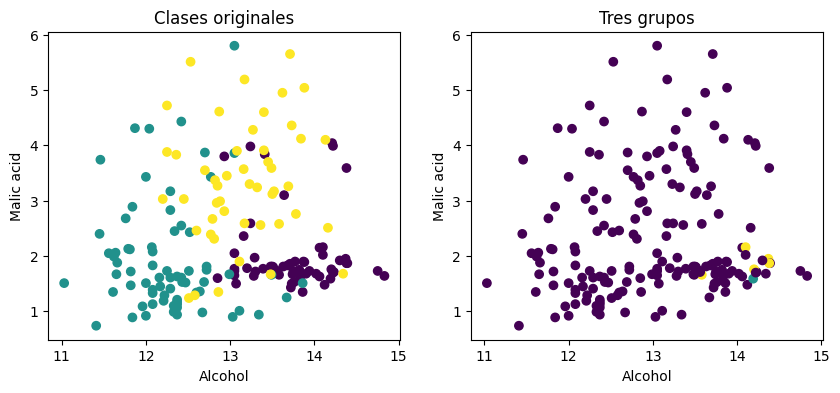

In [16]:
from sklearn.cluster import AgglomerativeClustering

wine = datasets.load_wine()
X = np.array(wine.data)
y1 = np.array(wine.target)

linkage = AgglomerativeClustering(linkage="single", n_clusters=3)
y_pred = linkage.fit_predict(X)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.scatter(X[:, 0], X[:, 1], c=y1)
ax0.set_title('Clases originales')
ax0.set_xlabel('Alcohol')
ax0.set_ylabel('Malic acid')

ax1.scatter(X[:, 0], X[:, 1], c=y_pred)
ax1.set_title('Tres grupos')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

plt.show()

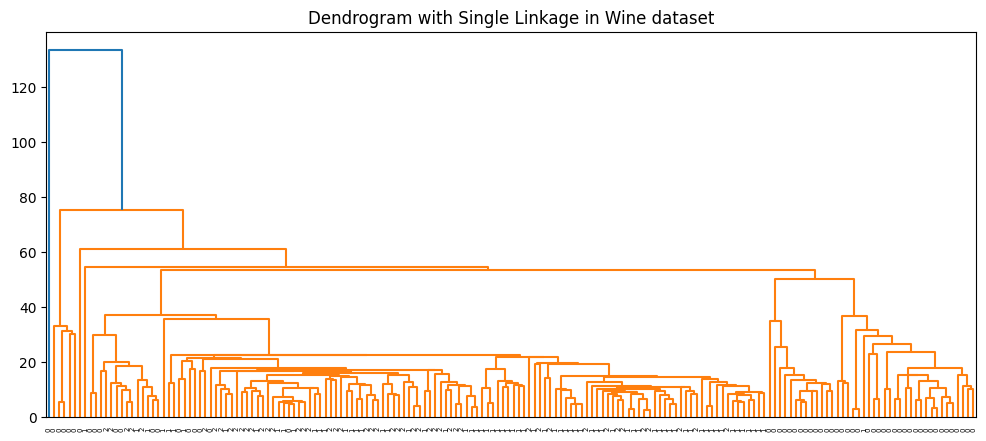

In [17]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12,5))
plt.title("Dendrogram with Single Linkage in Wine dataset")
dend = shc.dendrogram(shc.linkage(X, method='single'), labels=y1)

#### Spectral Clustering

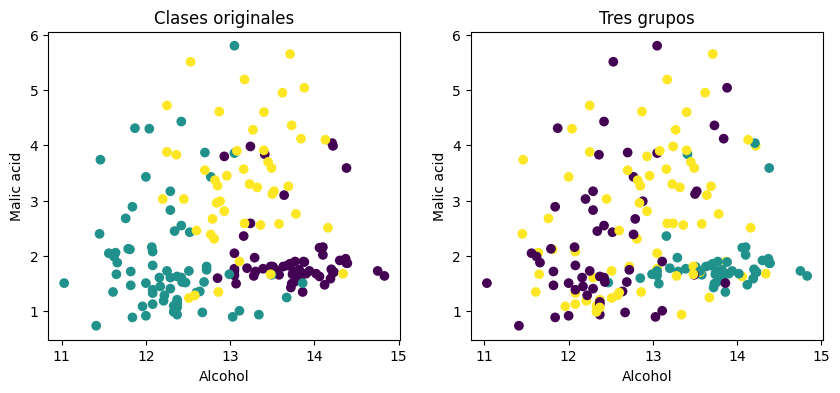

In [18]:
from sklearn.cluster import SpectralClustering

wine = datasets.load_wine()
X = np.array(wine.data)
y1 = np.array(wine.target)

spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors")
y_pred = spectral.fit_predict(X)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.scatter(X[:, 0], X[:, 1], c=y1)
ax0.set_title('Clases originales')
ax0.set_xlabel('Alcohol')
ax0.set_ylabel('Malic acid')

ax1.scatter(X[:, 0], X[:, 1], c=y_pred)
ax1.set_title('Tres grupos')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

plt.show()

## **Estrategias para seleccionar el numero adecuado de grupos**

### Índice de validación de los resultados de agrupamiento

In [19]:
import os
import pandas as pd
from zipfile import ZipFile
from dotenv import load_dotenv

load_dotenv('/Users/jvmx/Documents/TLG/.env')

!kaggle datasets download -d shree1992/housedata
with ZipFile('housedata.zip', 'r') as zip_ref:
    zip_ref.extractall('housedata')

house = pd.read_csv('housedata/data.csv')
print(house.head())

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
housedata.zip: Skipping, found more recently modified local copy (use --force to force download)
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0      

In [20]:
house2 = house.copy()

for col in house2.columns:
    if house2[col].dtype == 'object':
        house2[col] = OrdinalEncoder().fit_transform(house2[[col]])

house2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0.0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522.0,36.0,62.0,0.0
1,0.0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899.0,35.0,58.0,0.0
2,0.0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291.0,18.0,26.0,0.0
3,0.0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263.0,3.0,7.0,0.0
4,0.0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352.0,31.0,31.0,0.0


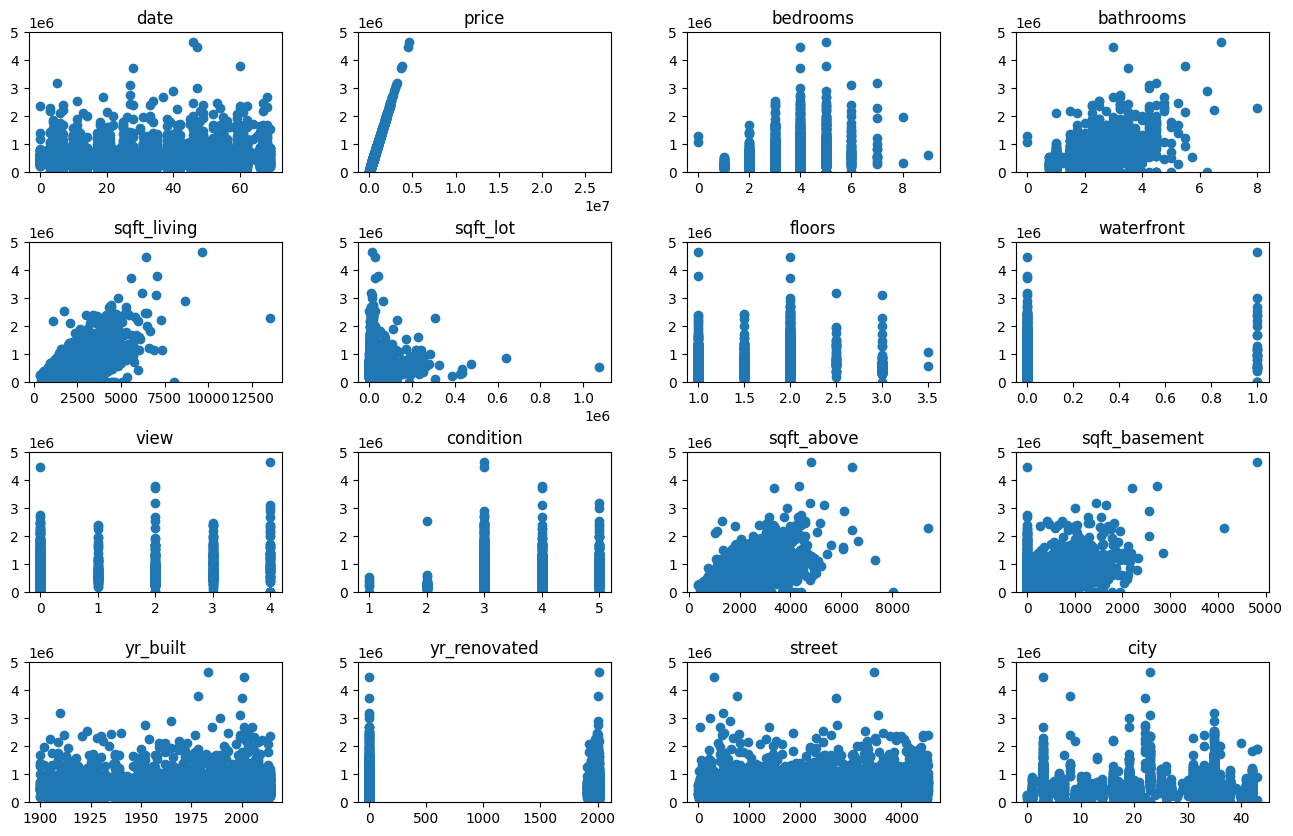

In [21]:
X_train = house2.to_numpy()
v = 0
fig, axs = plt.subplots(4, 4, figsize=(16, 10))
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(X_train[:,v], X_train[:,1])
        axs[i,j].set_title(house.columns[v])
        axs[i,j].set_ylim([0, 0.5e7])
        v += 1
        
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [22]:
from sklearn import cluster

X = StandardScaler().fit_transform(X_train)
k_means = cluster.KMeans(n_clusters=2).fit(X)
y2 = k_means.predict(X)

#### Silhouette Score

In [23]:
from sklearn.metrics import silhouette_score

idx_2 = silhouette_score(X, y2)
idx_2

0.17186917507816987

In [24]:
k_means = cluster.KMeans(n_clusters=3).fit(X)
y3 = k_means.predict(X)
idx_3 = silhouette_score(X, y3)
idx_3

0.15953434061972535

#### Calinski-Harabasz Score

In [25]:
from sklearn.metrics import calinski_harabasz_score

k_means_2 = cluster.KMeans(n_clusters=2).fit(X)
k_means_3 = cluster.KMeans(n_clusters=3).fit(X)

y_2 = k_means_2.predict(X)
y_3 = k_means_3.predict(X)

idx_2 = calinski_harabasz_score(X, y_2)
idx_3 = calinski_harabasz_score(X, y_3)

print(f'id_x2: {idx_2}')
print(f'id_x3: {idx_3}')

id_x2: 837.2794578923991
id_x3: 660.6971395135079


#### Gráfica K-Elbow

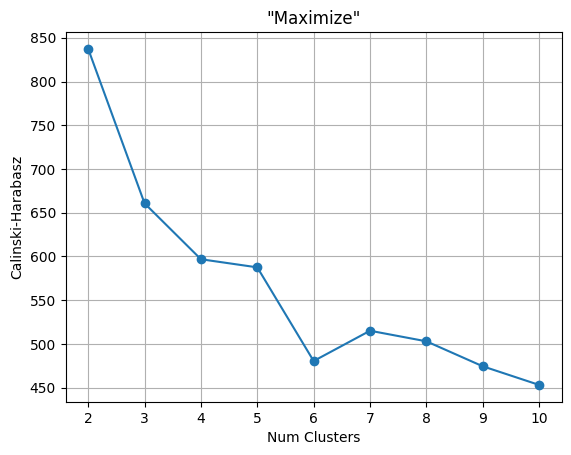

In [26]:
y_preds = []
results = {}
for k in range(2, 11):
    k_means = cluster.KMeans(n_clusters=k).fit(X)
    y_pred = k_means.predict(X)
    y_preds.append(y_pred)
    results[k] = metrics.calinski_harabasz_score(X, y_pred)
    
clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Calinski-Harabasz')
plt.show()

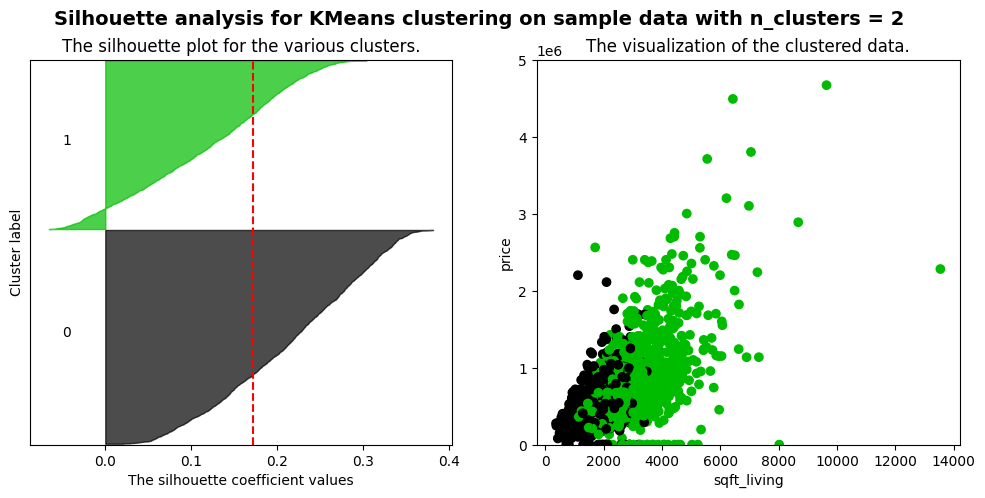

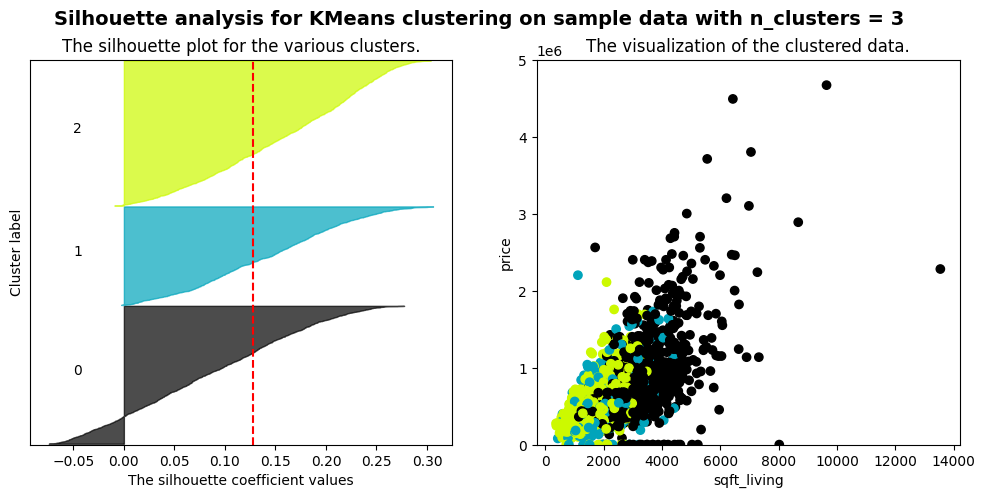

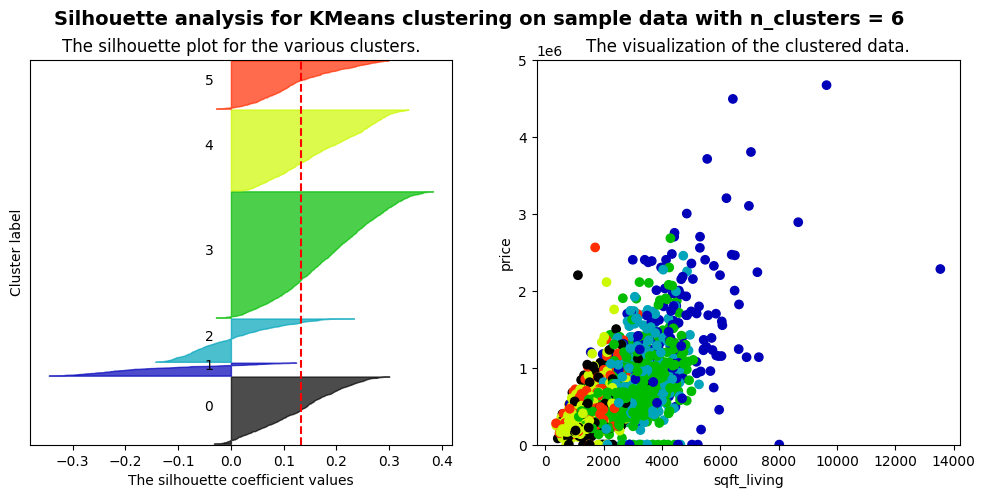

In [27]:
import matplotlib.cm as cm

house2.columns
ordinal_columns = {col: idx + 1 for idx, col in enumerate(house2.columns)}

for k in [2, 3, 6]:
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)
  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])
  k_means = cluster.KMeans(n_clusters=k)
  y_pred = k_means.fit_predict(X)
  silhouette_avg = metrics.silhouette_score(X, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks
  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")
  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  feat_num = 4
  feat_name = list(ordinal_columns.keys())[feat_num]
  ax1.scatter(X_train[:, feat_num], X_train[:, 1], c=colors)
  ax1.set_ylim(0, 0.5e7)
  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel(feat_name)
  ax1.set_ylabel('price')
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % k),
                fontsize=14, fontweight='bold')
plt.show()

## **Exploración, segmentación e interpretación de los datos después de agruparlos**

### Segmentación de datos basado en los resultados del agrupamiento

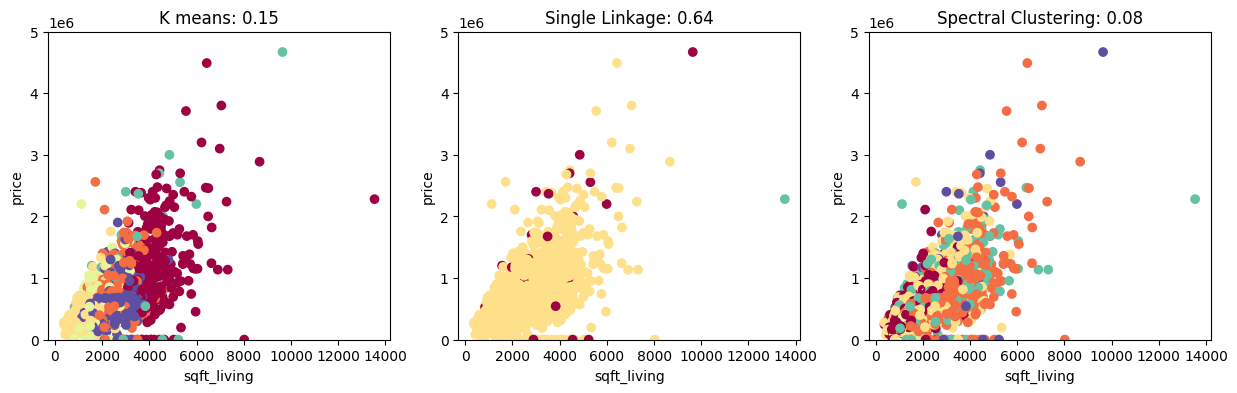

In [50]:
k = 6  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(X)
s1 = metrics.silhouette_score(X, y_pred1)

single_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=k)
y_pred2 = single_linkage.fit_predict(X)
s2 = metrics.silhouette_score(X, y_pred2)

spectral = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
y_pred3 = spectral.fit_predict(X)
s3 = metrics.silhouette_score(X, y_pred3)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,4))

ax0.scatter(X_train[:, feat_num], X_train[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
ax0.set_ylim(0, 0.5e7)
ax0.set_title('K means: '+"{:.2f}".format(s1))
ax0.set_xlabel(feat_name)
ax0.set_ylabel('price')

ax1.scatter(X_train[:, feat_num], X_train[:, 1], c=y_pred2, cmap=plt.cm.Spectral)
ax1.set_title('Single Linkage: '+"{:.2f}".format(s2))
ax1.set_ylim(0, 0.5e7)
ax1.set_xlabel(feat_name)
ax1.set_ylabel('price')

ax2.scatter(X_train[:, feat_num], X_train[:, 1], c=y_pred3, cmap=plt.cm.Spectral)
ax2.set_ylim(0, 0.5e7)
ax2.set_title('Spectral Clustering: '+"{:.2f}".format(s3))
ax2.set_xlabel(feat_name)
ax2.set_ylabel('price')

plt.show()

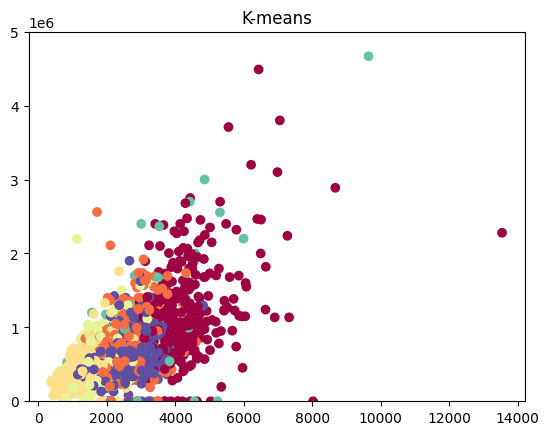

In [51]:
plt.scatter(X_train[:, feat_num], X_train[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.ylim(0, 0.5e7)
plt.title('K-means')
plt.show()

#### Segmentación de los Datos

In [52]:
house['groups'] = y_pred1
houses = [house[house['groups']==g] for g in range(k)]

In [53]:
for g in range(k):
    print('Group'+str(g),'has',len(houses[g]),'houses.')

Group0 has 409 houses.
Group1 has 760 houses.
Group2 has 1120 houses.
Group3 has 879 houses.
Group4 has 34 houses.
Group5 has 1398 houses.


#### Descripción de los grupos

In [54]:
grouped = pd.DataFrame() #Inicializar un dataframe vacío
# Añadir una columna para poner el nombre de las variables en cada fila
grouped['Features'] = house.columns[:-1]
# Algoritmo para llenar el dataframe con el promedio de cada variable dentro de cada grupo
for g in range(k):
    row = []
    for col in grouped['Features']:
        if houses[g][col].dtype != 'object':
            row.append(np.round(houses[g][col].mean(),2))
        else:
            row.append(houses[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = row
# Visualizar el dataframe
grouped

,Features,Group0,Group1,Group2,Group3,Group4,Group5
0,date,2014-07-01 00:00:00,2014-06-24 00:00:00,2014-06-23 00:00:00,2014-06-26 00:00:00,2014-05-12 00:00:00,2014-07-08 00:00:00
1,price,1127791.96,633186.91,378124.98,410613.35,2190985.29,527623.88
2,bedrooms,4.36,3.9,2.67,3.36,3.35,3.46
3,bathrooms,3.44,2.29,1.34,1.9,2.84,2.52
4,sqft_living,4086.52,2367.19,1307.73,1813.09,3404.53,2286.43
5,sqft_lot,46556.56,10033.76,8158.35,19643.72,21708.32,10380.56
6,floors,1.9,1.27,1.17,1.11,1.63,2.06
7,waterfront,0.0,0.0,0.0,0.0,0.97,0.0
8,view,0.88,0.53,0.08,0.06,3.44,0.06
9,condition,3.31,4.0,3.39,3.7,3.47,3.09


#### Feature importance

In [60]:
dfg = grouped.transpose()
dfg.columns = dfg.loc['Features']
dfg = dfg.drop('Features')
dfg = dfg[dfg.columns[1:12]]
dfg

Features,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
Group0,1127791.96,4.36,3.44,4086.52,46556.56,1.9,0.0,0.88,3.31,3443.21,643.31
Group1,633186.91,3.9,2.29,2367.19,10033.76,1.27,0.0,0.53,4.0,1558.52,808.67
Group2,378124.98,2.67,1.34,1307.73,8158.35,1.17,0.0,0.08,3.39,1167.44,140.29
Group3,410613.35,3.36,1.9,1813.09,19643.72,1.11,0.0,0.06,3.7,1486.05,327.04
Group4,2190985.29,3.35,2.84,3404.53,21708.32,1.63,0.97,3.44,3.47,2584.97,819.56
Group5,527623.88,3.46,2.52,2286.43,10380.56,2.06,0.0,0.06,3.09,2225.33,61.1


In [66]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'  # This will open the figure in your web browser

Xt = StandardScaler().fit_transform(dfg.to_numpy())
Xt = Xt + abs(np.min(Xt))
fig = go.Figure()
for j in range(len(dfg)):
  fig.add_trace(go.Bar(
      y=Xt[j,:],
      x=dfg.columns,
      name='Group '+str(j)
  ))
fig.update_layout(
    title='Variable mean per group',
    yaxis_title='normalized values',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

### Visualizaciones asociadas a los grupos obtenidos​

In [68]:
house1 = house.sort_values('groups')
groups = house1['groups']
house1 = house1[house1.columns[1:12]]

xt = StandardScaler().fit_transform(house1.to_numpy())
x = ['Group'+str(i) for i in groups]

In [69]:
fig = go.Figure()
for j in range(len(house1.columns)):
  fig.add_trace(go.Box(
      y=xt[:,j],
      x=x,
      name=house1.columns[j]
  ))
fig.update_layout(
    title='Variable distribution per group',
    yaxis_title='normalized values',
    boxmode='group',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

#### PCA

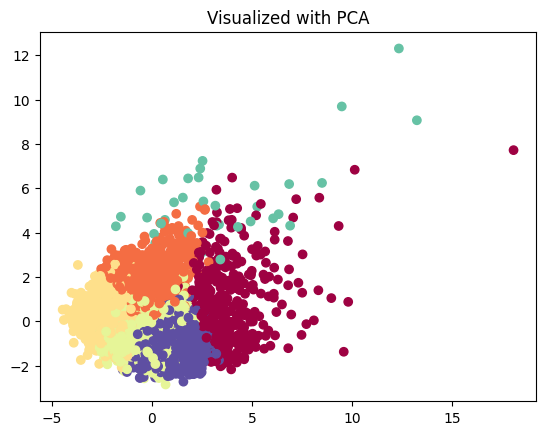

In [74]:
from sklearn.decomposition import PCA
X2 = PCA(n_components=2).fit_transform(X)

plt.scatter(X2[:, 0], X2[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.title('Visualized with PCA')
plt.show()

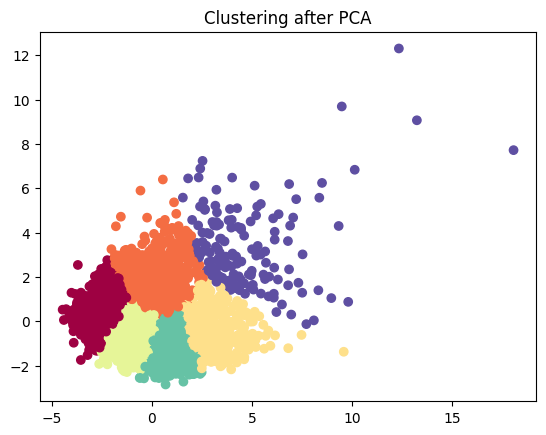

In [71]:
y_pca = cluster.KMeans(n_clusters=6).fit_predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_pca, cmap=plt.cm.Spectral)
plt.title('Clustering after PCA')
plt.show()

In [72]:
house_pca = house.copy(deep=True)
house_pca['groups'] = y_pca
houses_pca = [house_pca[house_pca['groups']==g] for g in range(k)]

grouped_pca = pd.DataFrame()
grouped_pca['Features'] = house_pca.columns[:-1]
for g in range(k):
    row = []
    for col in grouped_pca['Features']:
        if houses_pca[g][col].dtype != 'object':
            row.append(np.round(houses_pca[g][col].mean(),2))
        else:
            row.append(houses_pca[g][col].value_counts().keys()[0])
    grouped_pca['Group'+str(g)] = row
grouped_pca

,Features,Group0,Group1,Group2,Group3,Group4,Group5
0,date,2014-06-23 00:00:00,2014-06-25 00:00:00,2014-06-20 00:00:00,2014-06-23 00:00:00,2014-07-08 00:00:00,2014-06-20 00:00:00
1,price,374678.3,666851.93,853117.84,379871.46,493979.79,1748701.56
2,bedrooms,2.63,3.93,4.15,3.09,3.46,4.65
3,bathrooms,1.27,2.35,3.08,1.82,2.48,3.7
4,sqft_living,1277.08,2471.42,3528.19,1583.88,2206.63,4647.84
5,sqft_lot,7870.85,12160.63,30715.03,13026.5,13957.11,40352.32
6,floors,1.12,1.28,1.97,1.26,2.0,1.8
7,waterfront,0.0,0.01,0.0,0.0,0.0,0.15
8,view,0.07,0.63,0.27,0.02,0.03,2.33
9,condition,3.6,3.89,3.16,3.45,3.14,3.56


#### TSNE

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 4600
[t-SNE] Computed conditional probabilities for sample 2000 / 4600
[t-SNE] Computed conditional probabilities for sample 3000 / 4600
[t-SNE] Computed conditional probabilities for sample 4000 / 4600
[t-SNE] Computed conditional probabilities for sample 4600 / 4600
[t-SNE] Mean sigma: 0.944012
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.542918
[t-SNE] KL divergence after 1000 iterations: 1.238442


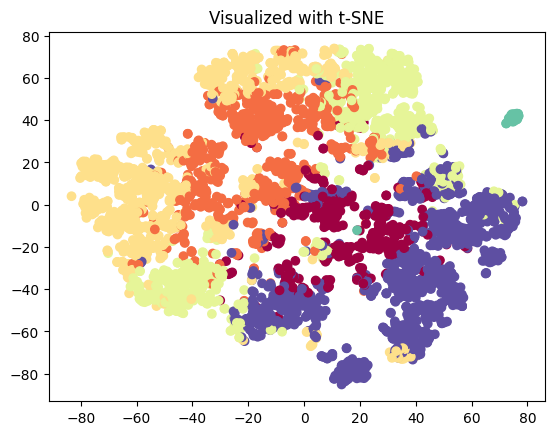

In [76]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, 
            init='pca',
            random_state=0,
            method='exact',
            verbose=1).fit_transform(X)

plt.scatter(tsne[:, 0], tsne[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.title('Visualized with t-SNE')
plt.show()